# Classification Agorithms

## **Loan Eligibility Prediction Model**

### Project Scope:

Loans form an integral part of banking operations. However, not all loans are returned and hence it is important for a bank to closely moniter its loan applications. This case study is an analysis of the German Credit data. It contains details of 614 loan applicants with 13 attributes and the classification whether an applicant was granted loan or denied loan.

**Your role:** Using the available dataset, train a classification model to predict whether an applicant should be given loan.

**Goal:** Build a model to predict loan eligiblity with an average acuracy of more than 76%

**Specifics:** 

* Machine Learning task: Classification model 
* Target variable: Loan_Status 
* Input variables: Refer to data dictionary below
* Success Criteria: Accuracy of 76% and above


## Data Dictionary:

* **Loan_ID:** Applicant ID
* **Gender:** Gender of the applicant Male/Female
* **Married:** Marital status of the applicant
* **Dependents:** Number of dependants the applicant has
* **Education:** Highest level of education
* **Self_Employed:** Whether self-employed Yes/No
* **ApplicantIncome:** Income of the applicant
* **CoapplicantIncome:** Income of the co-applicant
* **LoanAmount:** Loan amount requested
* **Loan_Amount_Term:** Term of the loan
* **Credit_History:** Whether applicant has a credit history
* **Property_Area:** Current property location
* **Loan_Approved:** Loan approved yes/no

## **Data Analysis and Data Prep**

### Loading all the necessary packages

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading the data

In [11]:
# Import the data from 'credit.csv'
df = pd.read_csv('credit.csv')
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128,360,1,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


In [12]:
# check the number of rows and observations
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 614
Number of columns: 13


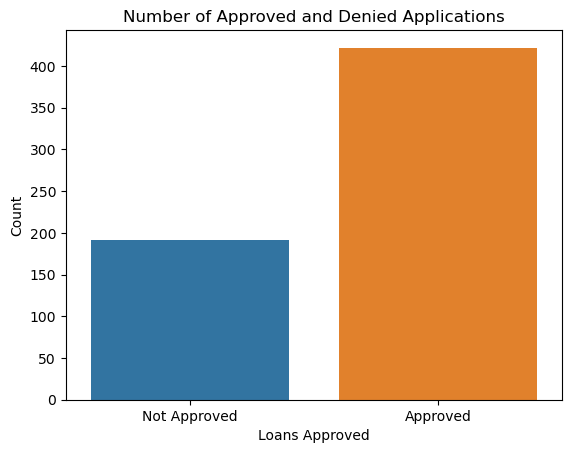

In [13]:
# How many application were approved and how many were denied? Plot a bar plot
num_approved = df['Loan_Approved'].value_counts()

sns.barplot(x=num_approved.index, y=num_approved.values)
plt.xticks([0, 1], ['Not Approved', 'Approved'])
plt.title('Number of Approved and Denied Applications')
plt.xlabel('Loans Approved')
plt.ylabel('Count')
plt.show()

### Data Prep

In [14]:
# drop 'Loan_ID' variable from the data. We won't need it.
df = df.drop('Loan_ID', axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Approved
0,Male,No,0,Graduate,No,5849,0.0,128,360,1,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,1


In [19]:
# Create dummy variables for all 'object' type variables except 'Loan_Status'
object_cols = df.select_dtypes(include=['object']).columns.tolist()
object_cols = [col for col in object_cols if col != 'Loan Status']

df = pd.get_dummies(df, columns=object_cols, drop_first=True)

df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Approved,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Gender_Male,Married_Yes,Property_Area_Semiurban,Property_Area_Urban,Self_Employed_Yes
0,5849,0.0,128,360,1,1,False,False,False,False,True,False,False,True,False
1,4583,1508.0,128,360,1,0,True,False,False,False,True,True,False,False,False
2,3000,0.0,66,360,1,1,False,False,False,False,True,True,False,True,True
3,2583,2358.0,120,360,1,1,False,False,False,True,True,True,False,True,False
4,6000,0.0,141,360,1,1,False,False,False,False,True,False,False,True,False


In [20]:
# saving this procewssed dataset
df.to_csv('Processed_Credit_Dataset.csv', index=None)

### Data Partition

In [29]:
# Seperate the input features and target variable
print(df.columns)

target_variable = 'Loan_Status'

x = df.drop('Loan_Approved', axis=1)
y = df['Loan_Approved']

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Approved', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
       'Gender_Male', 'Married_Yes', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Self_Employed_Yes'],
      dtype='object')


In [34]:
# splitting the data in training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (460, 14)
x_test shape: (154, 14)
y_train shape: (460,)
y_test shape: (154,)


In [35]:
# check the split if interested
print("Training Set:")
print(x_train.head())
print(y_train.head())

print("\nTesting Set:")
print(x_test.head())
print(y_test.head())

Training Set:
     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
611             8072              240.0         253               360   
577             3229             2739.0         110               360   
489             2435                0.0          75               360   
513             2130             6666.0          70               180   
484             8333                0.0         246               360   

     Credit_History  Dependents_1  Dependents_2  Dependents_3+  \
611               1          True         False          False   
577               1         False         False          False   
489               1         False         False          False   
513               1         False         False          False   
484               1         False          True          False   

     Education_Not Graduate  Gender_Male  Married_Yes  \
611                   False         True         True   
577                   False         

# **Models**

## <font color='chocolate'>**1. Logistic Regression**</font>

In [76]:
# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [77]:
# Fit the model on the data
model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [78]:
# From sklearn.metrics import accuracy_score and confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix

# Predict the loan eligibility on testing set and calculate its accuracy.
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8896


In [79]:
# Print the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 26  16]
 [  1 111]]


In [80]:
# check how probabilities are assigned
probabilities = model.predict_proba(x_test)
print("Probabilities:")
print(probabilities)

Probabilities:
[[0.22511345 0.77488655]
 [0.28464226 0.71535774]
 [0.16040356 0.83959644]
 [0.26819334 0.73180666]
 [0.22728596 0.77271404]
 [0.83557893 0.16442107]
 [0.10764279 0.89235721]
 [0.86856545 0.13143455]
 [0.17275443 0.82724557]
 [0.26574937 0.73425063]
 [0.19285377 0.80714623]
 [0.37184412 0.62815588]
 [0.14823421 0.85176579]
 [0.27170796 0.72829204]
 [0.17939039 0.82060961]
 [0.81324173 0.18675827]
 [0.80503531 0.19496469]
 [0.13748304 0.86251696]
 [0.15391378 0.84608622]
 [0.31476827 0.68523173]
 [0.28002167 0.71997833]
 [0.15553228 0.84446772]
 [0.3069534  0.6930466 ]
 [0.772434   0.227566  ]
 [0.20309599 0.79690401]
 [0.1478907  0.8521093 ]
 [0.22688195 0.77311805]
 [0.12716393 0.87283607]
 [0.43573916 0.56426084]
 [0.45443199 0.54556801]
 [0.27466346 0.72533654]
 [0.25717189 0.74282811]
 [0.85734455 0.14265545]
 [0.36131079 0.63868921]
 [0.18936903 0.81063097]
 [0.20601374 0.79398626]
 [0.37334066 0.62665934]
 [0.2380485  0.7619515 ]
 [0.06923169 0.93076831]
 [0.229410

In [81]:
# to change the default threshold and to make it 70% and above
#(pypred[:, 1] >= 0.7).astype(int)
custom_threshold = 0.7
custom_predictions = (probabilities[:, 1] >= custom_threshold).astype(int)
print(f"Predictions with Custom Threshold ({custom_threshold * 100}%):")
print(custom_predictions)

Predictions with Custom Threshold (70.0%):
[1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1
 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 1 1 0 1 1
 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1
 1 0 0 1 1 1]


## <font color='chocolate'>**2. Random Forest**

In [89]:
# Import RandomForestClassifier 
from sklearn.ensemble import RandomForestClassifier

In [90]:
# Let's list the tunable hyperparameters for Random Forest algorithm
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 0.33],
    'min_samples_leaf': [1, 3, 5, 10]
}

For random forests,

* The first hyperparameter to tune is n_estimators. We will try 100 and 200.

* The second one is max_features. Let's try - 'auto', 'sqrt', and 0.33.

* The third one is min_samples_leaf. Let's try - 1, 3, 5, 10

In [98]:
# Fit a Random Forest Classifier
num_features = x_train.shape[1]
rf_model = RandomForestClassifier(n_estimators=200, max_features=num_features, min_samples_leaf=1, random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Confusion Matrix:")
print(conf_matrix_rf)

Random Forest Accuracy: 0.7724

Random Forest Confusion Matrix:
[[19 24]
 [ 4 76]]
